<a href="https://colab.research.google.com/github/samarthgupta1/Walmart---Confidence-Interval-and-CLT/blob/main/Walmart.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Business Problem

The Management team at Walmart Inc. wants to analyze the customer purchase behavior (specifically, purchase amount) against the customer’s gender and the various other factors to help the business make better decisions. They want to understand if the spending habits differ between male and female customers: Do women spend more on Black Friday than men?

In [ ]:
import pandas as pd 
import numpy as np 
import seaborn  as sns
import matplotlib.pyplot as plt
from scipy.stats import norm
import math 

In [ ]:
pd.reset_option("display.max_rows")

In [ ]:
df=pd.read_csv(r"/content/drive/MyDrive/walmart_data.txt")
df

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969
...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,51-55,13,B,1,1,20,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,365


In [ ]:
df.isna().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category              0
Purchase                      0
dtype: int64

In [ ]:
df["Marital_Status"].replace(to_replace=[0,1],
           value=["Notmarried","Married"],inplace=True)

df

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,Notmarried,3,8370
1,1000001,P00248942,F,0-17,10,A,2,Notmarried,1,15200
2,1000001,P00087842,F,0-17,10,A,2,Notmarried,12,1422
3,1000001,P00085442,F,0-17,10,A,2,Notmarried,12,1057
4,1000002,P00285442,M,55+,16,C,4+,Notmarried,8,7969
...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,51-55,13,B,1,Married,20,368
550064,1006035,P00375436,F,26-35,1,C,3,Notmarried,20,371
550065,1006036,P00375436,F,26-35,15,B,4+,Married,20,137
550066,1006038,P00375436,F,55+,1,C,2,Notmarried,20,365


In [ ]:
df.describe()

,User_ID,Occupation,Product_Category,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000
mean,1.003029e+06,8.076707,5.404270,9263.968713
std,1.727592e+03,6.522660,3.936211,5023.065394
min,1.000001e+06,0.000000,1.000000,12.000000
25%,1.001516e+06,2.000000,1.000000,5823.000000
50%,1.003077e+06,7.000000,5.000000,8047.000000
75%,1.004478e+06,14.000000,8.000000,12054.000000
max,1.006040e+06,20.000000,20.000000,23961.000000


In [ ]:
df.describe(include='object')

,Product_ID,Gender,Age,City_Category,Stay_In_Current_City_Years,Marital_Status
count,550068,550068,550068,550068,550068,550068
unique,3631,2,7,3,5,2
top,P00265242,M,26-35,B,1,Notmarried
freq,1880,414259,219587,231173,193821,324731


In [ ]:
df.shape

(550068, 10)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  object
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 42.0+ MB


In [ ]:
df.nunique()

User_ID                        5891
Product_ID                     3631
Gender                            2
Age                               7
Occupation                       21
City_Category                     3
Stay_In_Current_City_Years        5
Marital_Status                    2
Product_Category                 20
Purchase                      18105
dtype: int64

In [ ]:
df["Purchase"].sum()

5095812742

In [ ]:
pd.set_option("display.max_rows",None)
df.head(10)
pd.reset_option("display.max_rows")

In [ ]:
df["Gender"].value_counts()

M    414259
F    135809
Name: Gender, dtype: int64

In [ ]:
df["Age"].value_counts()

26-35    219587
36-45    110013
18-25     99660
46-50     45701
51-55     38501
55+       21504
0-17      15102
Name: Age, dtype: int64

In [ ]:
df["Occupation"].value_counts()

4     72308
0     69638
7     59133
1     47426
17    40043
20    33562
12    31179
14    27309
2     26588
16    25371
6     20355
3     17650
10    12930
5     12177
15    12165
11    11586
19     8461
13     7728
18     6622
9      6291
8      1546
Name: Occupation, dtype: int64

In [ ]:
df["Product_Category"].value_counts()

5     150933
1     140378
8     113925
11     24287
2      23864
6      20466
3      20213
4      11753
16      9828
15      6290
13      5549
10      5125
12      3947
7       3721
18      3125
20      2550
19      1603
14      1523
17       578
9        410
Name: Product_Category, dtype: int64

In [ ]:
df["City_Category"].value_counts()

B    231173
C    171175
A    147720
Name: City_Category, dtype: int64

In [ ]:
df["Marital_Status"].value_counts()

Notmarried    324731
Married       225337
Name: Marital_Status, dtype: int64

In [ ]:
df.head(1)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,Notmarried,3,8370


# Insights 

*   There are no missing values in the data.

*   Male had purchased more products  then female during black friday.

*   People with  age between 26-45 are most frequent buyers then others .

*   People with  living in B category_city are most frequent buyers then others .
*   People that are new or  living in a city  for like 1 year only are most   frequent buyers then others . 

*   People who aren't married  are most frequent buyers then married one's .


*   Total of 20 product categories are there and people had bought with       product_category 5 & 1 more than other categories.

*   There are 20 differnent types of occupations and people had bought with occupation  of type 4 & 0 more than other types.

*   Purchase amount might have outliers.


<Axes: xlabel='City_Category', ylabel='count'>

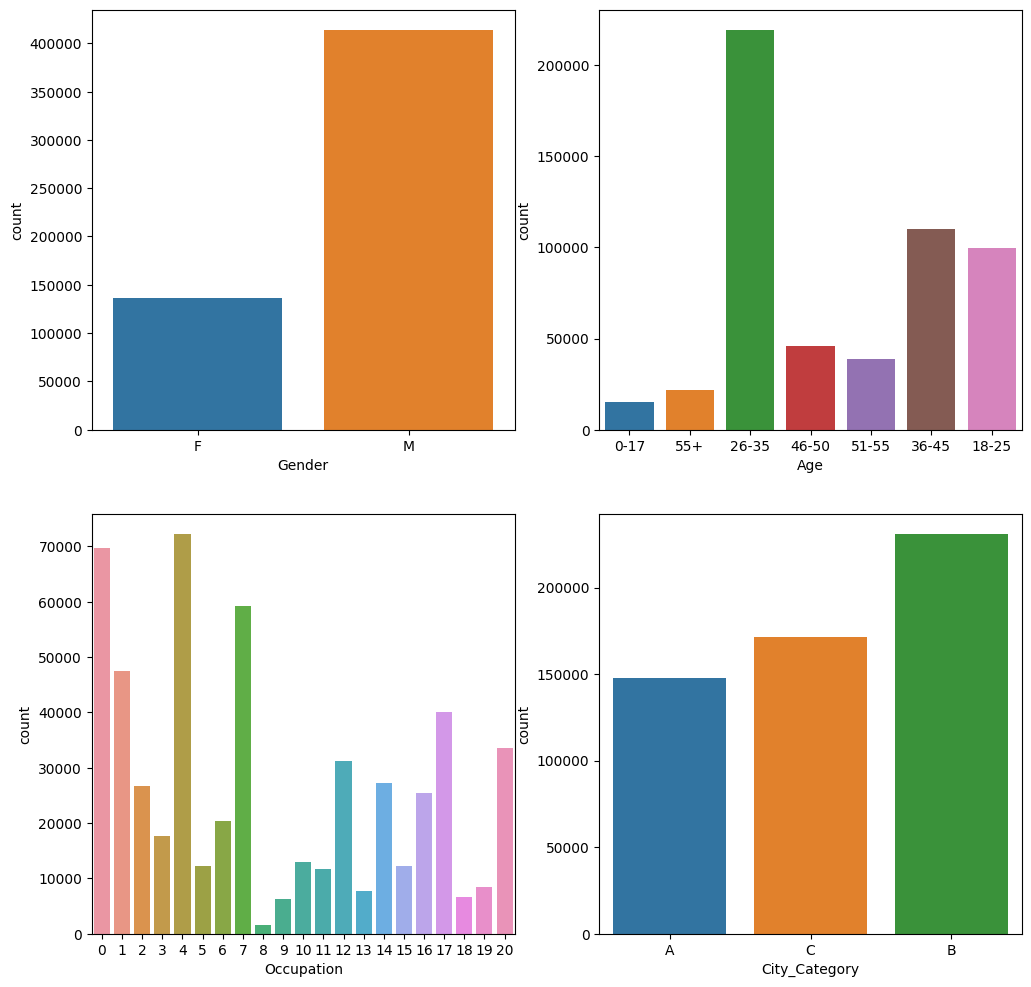

In [ ]:
fig=plt.figure(figsize=(12,12))

plt.subplot(2,2,1)
sns.countplot(data=df, x="Gender")

plt.subplot(2,2,2)
sns.countplot(data=df, x="Age")

plt.subplot(2,2,3)
sns.countplot(data=df, x="Occupation")

plt.subplot(2,2,4)
sns.countplot(data=df, x="City_Category")



# Insights 


*    Most of the users are Male.

*   People with  age between 18-45 are  majority buyers  .

*   More users belong to B City_Category .
*   There are 20 differnent types of occupations and people had bought with occupation  of type 4 ,7 & 0 more than other types.


<Axes: xlabel='Product_Category', ylabel='count'>

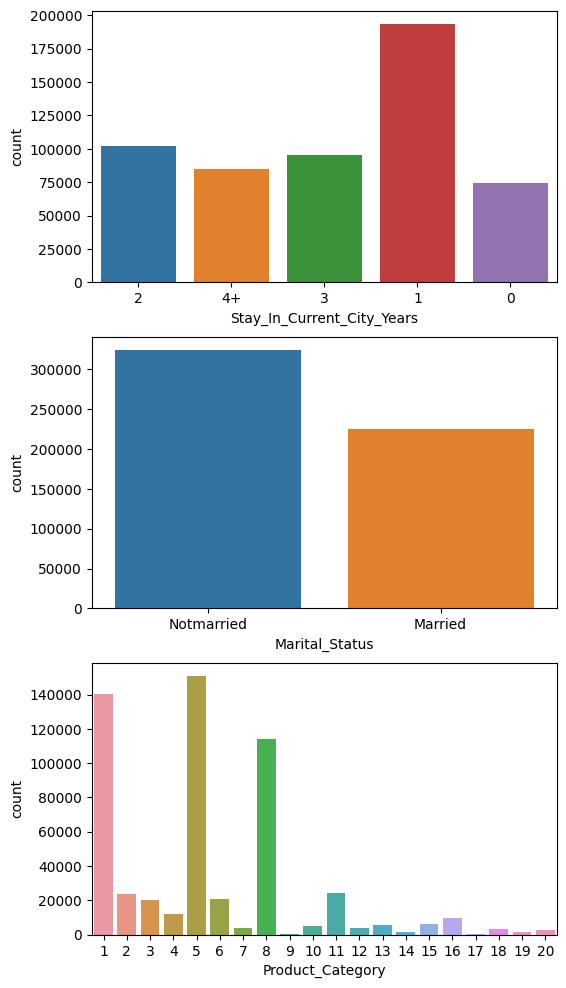

In [ ]:
fig=plt.figure(figsize=(6,12))

plt.subplot(3,1,1)
sns.countplot(data=df, x="Stay_In_Current_City_Years")

plt.subplot(3,1,2)
sns.countplot(data=df, x="Marital_Status")

plt.subplot(3,1,3)
sns.countplot(data=df, x="Product_Category")

# Insights 


*    People that are kind of  new like living in a city for past  1 year only are most frequent buyers then others .

*   Married  customers are less compare to UnMarried .

*   Product_Category - 1, 5 & 8 have highest purchasing frequency.

<Axes: xlabel='Purchase'>

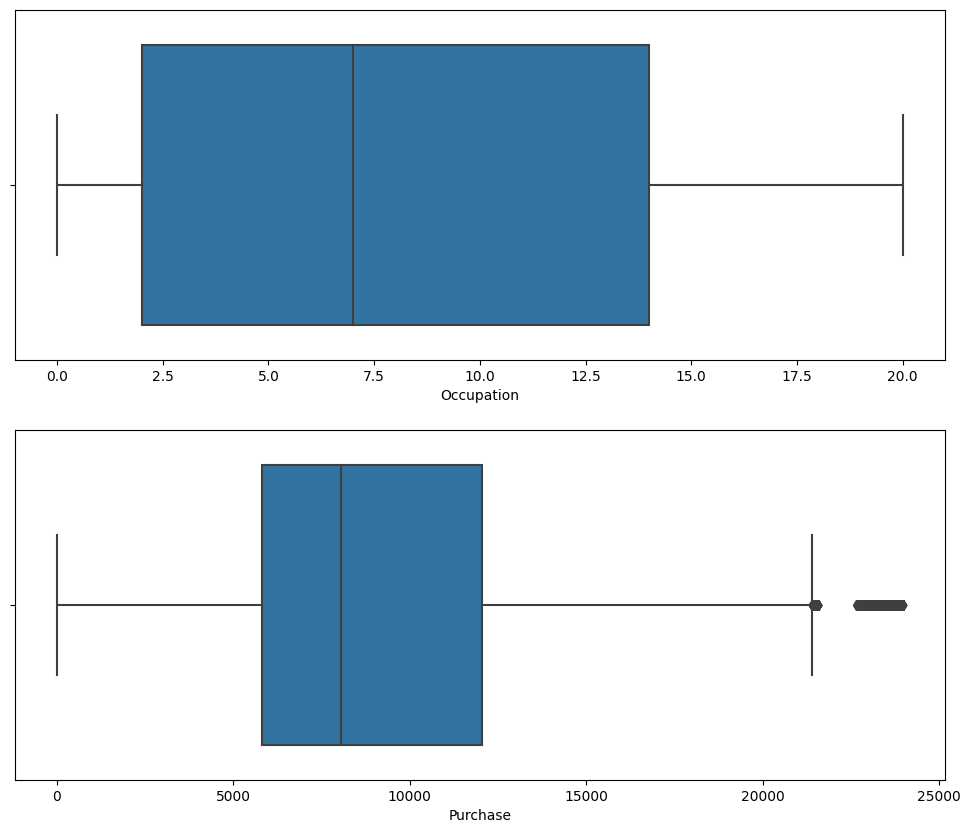

In [ ]:
fig=plt.figure(figsize=(12,10))
plt.subplot(2,1,1)
 
plt.subplot(2,1,2)
sns.boxplot(data=df, x="Purchase", orient='h')


# Insights

From above box plot we can see that **Purchase** has **many outliers**  and **occupations** has **no outliers**.




In [ ]:
df_gender=df.groupby(["Gender"])["User_ID"].nunique()
df_gender=df_gender.reset_index()

In [ ]:
df_gender["User_ID"]=(df_gender["User_ID"]/df["User_ID"].nunique())*100

In [ ]:
df_gender

,Gender,User_ID
0,F,28.280428
1,M,71.719572


Text(0.5, 1.0, 'Gender % on unique USER_ID')

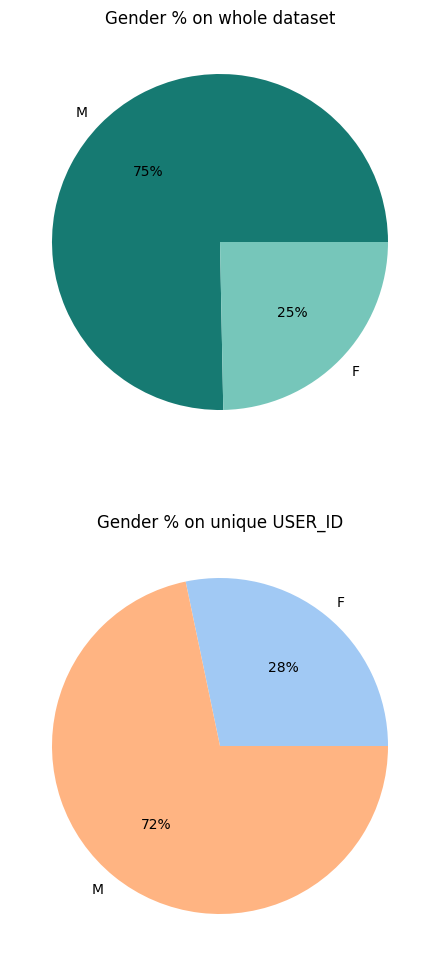

In [ ]:
fig=plt.figure(figsize=(6,12))

plt.subplot(2,1,1)
data = df['Gender'].value_counts(normalize=True)*100
palette_color = sns.color_palette('BrBG_r')
plt.pie(x=data.values, labels=data.index, autopct='%.0f%%', colors=palette_color)
plt.title("Gender % on whole dataset")

plt.subplot(2,1,2)
data1 = df_gender["Gender"]
data2 =df_gender["User_ID"]
palette_color = sns.color_palette('pastel')
plt.pie(x=data2, labels=data1,autopct='%.0f%%', colors=palette_color)
plt.title("Gender % on unique USER_ID")


##***Above two graphs are self-explanatory.***

In [ ]:
df2 = df[["Gender","Age","City_Category","Stay_In_Current_City_Years","Marital_Status"]].melt()
df2=round((df2.groupby(['variable', 'value'])[['value']].count() *100)/ len(df),1)
df2.rename(columns={"value":"%value"})

%value
variable                   value             
Age                        0-17           2.7
                           18-25         18.1
                           26-35         39.9
                           36-45         20.0
                           46-50          8.3
                           51-55          7.0
                           55+            3.9
City_Category              A             26.9
                           B             42.0
                           C             31.1
Gender                     F             24.7
                           M             75.3
Marital_Status             Married       41.0
                           Notmarried    59.0
Stay_In_Current_City_Years 0             13.5
                           1             35.2
                           2             18.5
                           3             17.3
                           4+            15.4

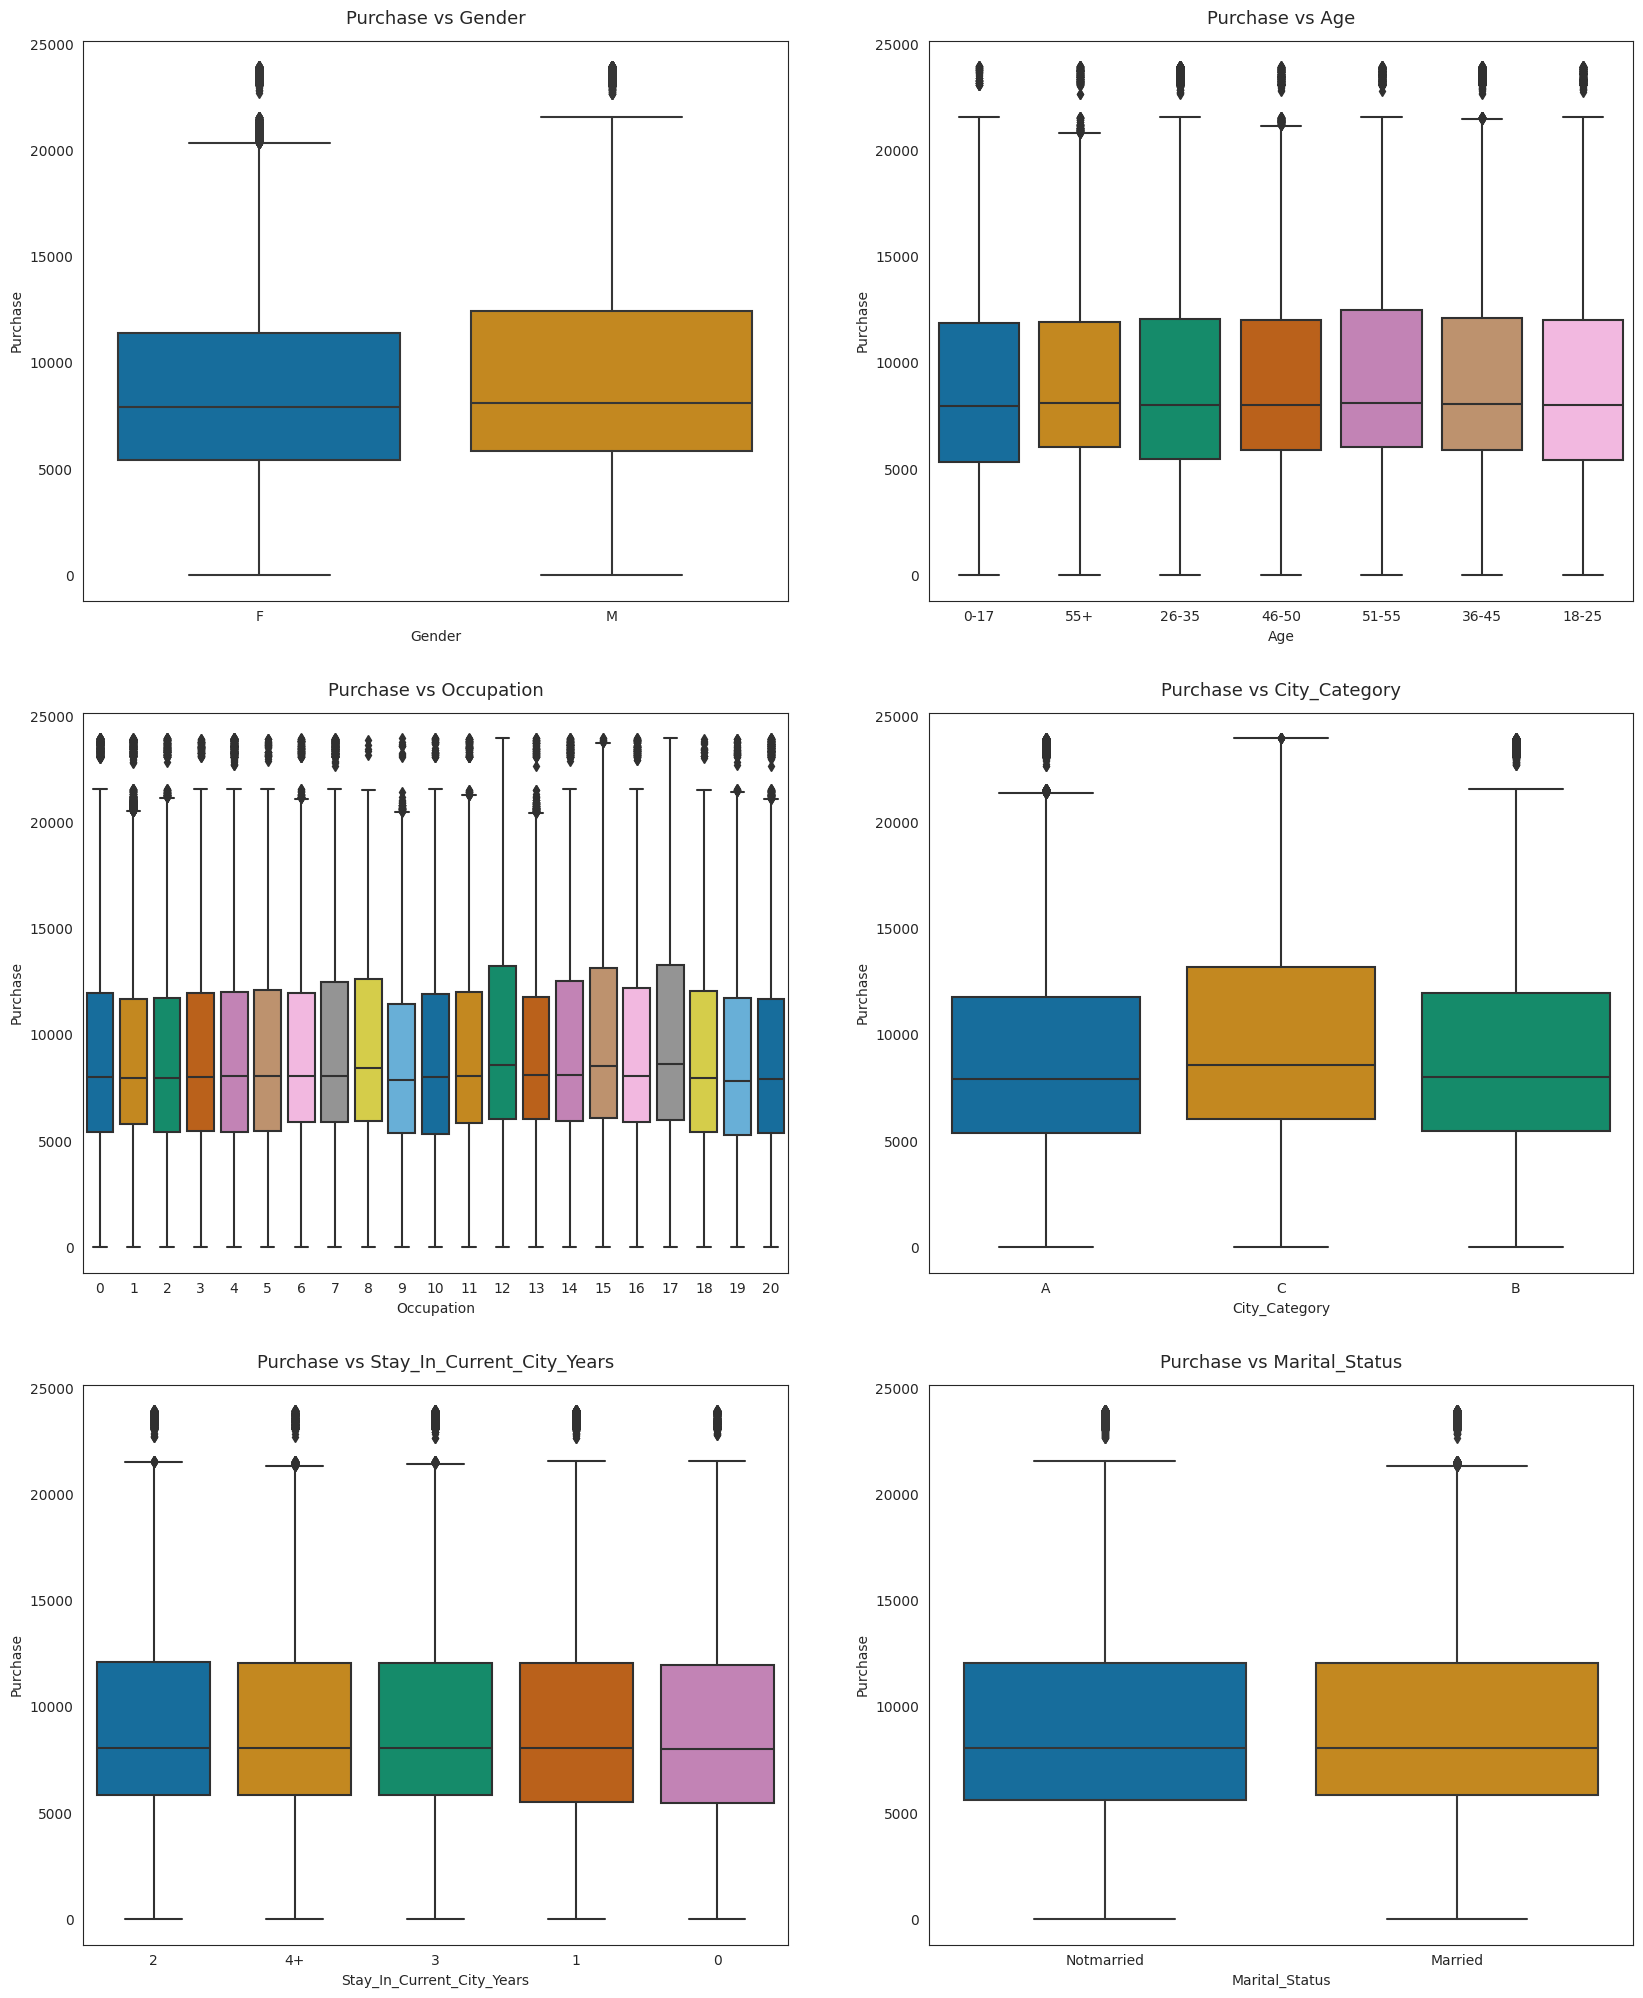

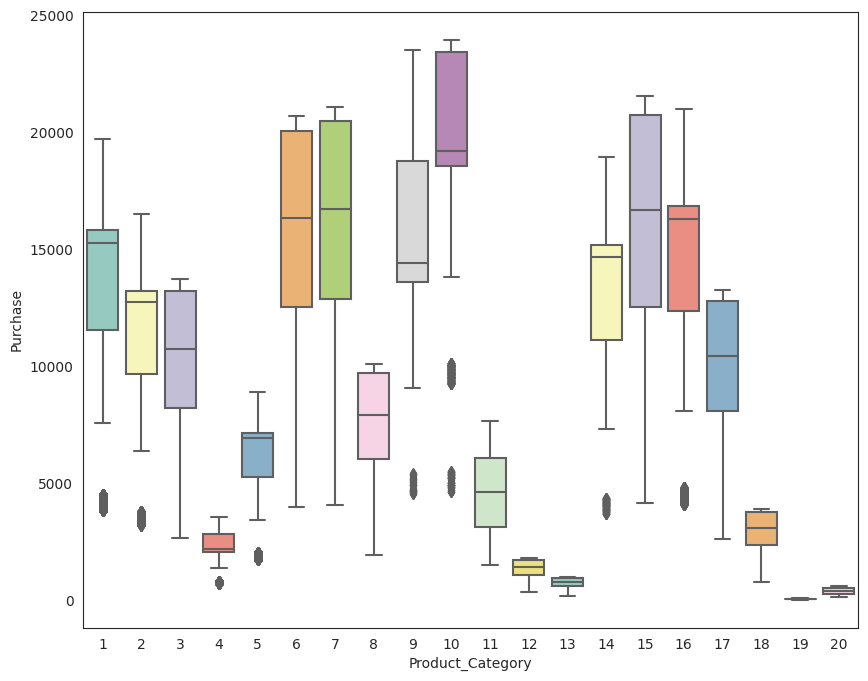

In [ ]:
attrs = ['Gender', 'Age', 'Occupation', 'City_Category', 'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category']
sns.set_style("white")

fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(20, 16))
fig.subplots_adjust(top=1.3)
count = 0
for row in range(3):
    for col in range(2):
        sns.boxplot(data=df, y='Purchase', x=attrs[count], ax=axs[row, col], palette='colorblind')
        axs[row,col].set_title(f"Purchase vs {attrs[count]}", pad=12, fontsize=13)
        count += 1
plt.show()

plt.figure(figsize=(10, 8))
sns.boxplot(data=df, y='Purchase', x=attrs[-1], palette='Set3')
plt.show()

## Insights


*   Median value of purchase amount are kind of same for male and female customers.
*   Median value of purchase amount for 9,19,20  are kind a lowest than others.


*   Median value of purchase amount for city of category c is more than others since people living in c category city have purchases on higher side .
*   People who are new to the city or living for a long time have same median purchase amount.

*   Purcahse amount for married and unmarried are kind of same .
*   Product that belong to product_category 10 are costliest.

*   Product that belong to product_category 12,13,19,20 have lowest purcahse amount(cheapest).





Text(0.5, 1.0, 'Purcahses based on Marital Status & Gender')

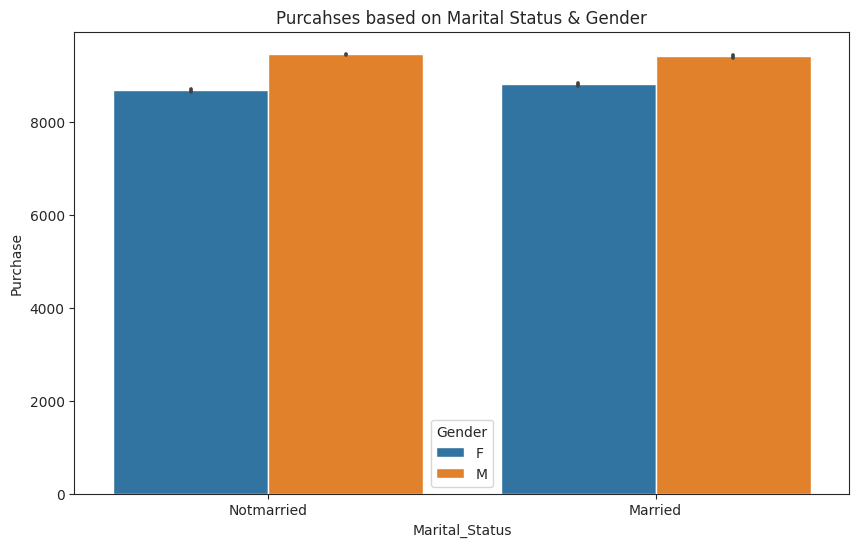

In [ ]:
plt.figure(figsize =(10,6))
sns.set_style("ticks")
sns.barplot(x="Marital_Status",y=df["Purchase"],hue = "Gender",data = df)
plt.title("Purcahses based on Marital Status & Gender")

# Insight

*   Males married or unmarried have high Average purchase amount than females.



Text(0.5, 1.0, 'Purcahses based on Age & Gender')

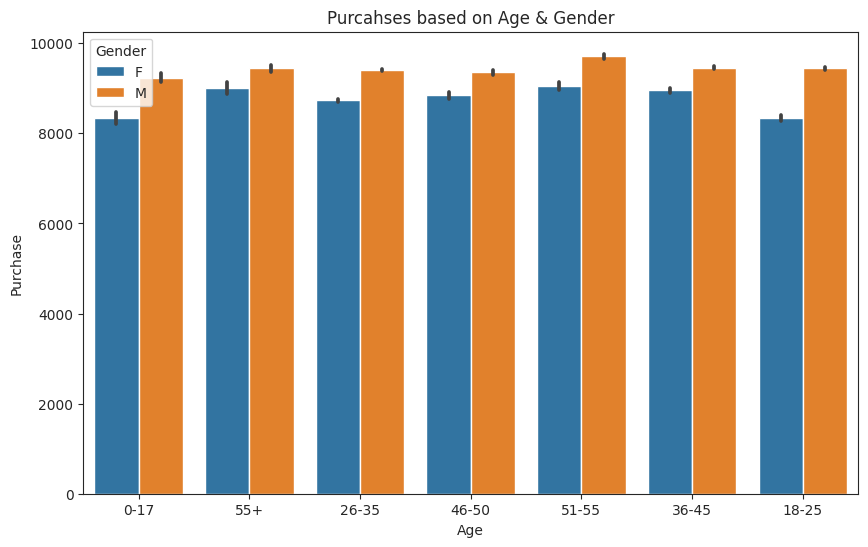

In [ ]:
plt.figure(figsize =(10,6))
sns.set_style("ticks")
sns.barplot(x="Age",y="Purchase",hue = "Gender",data = df)
plt.title("Purcahses based on Age & Gender")

# Insight

*   Males belonging  to any age group  have high Average purchase amount than females.

Text(0.5, 1.0, 'Purcahses based on City category & Gender')

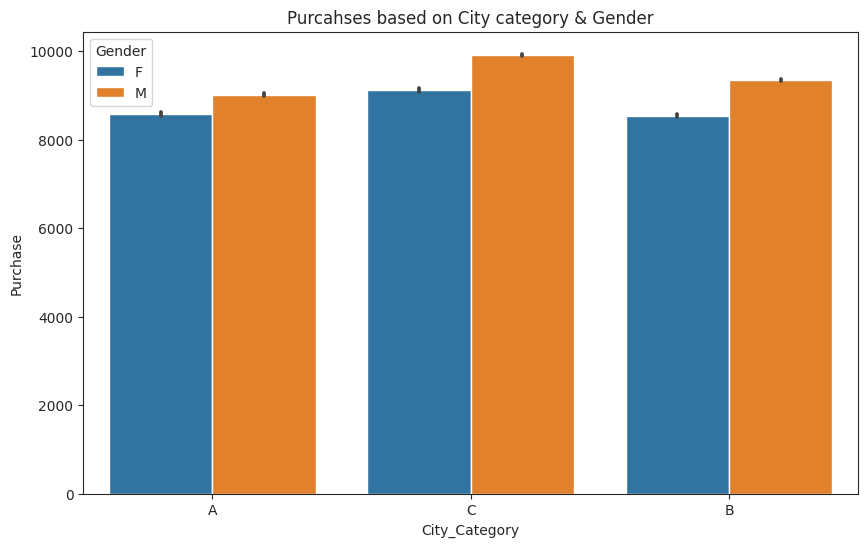

In [ ]:
plt.figure(figsize =(10,6))
sns.set_style("ticks")
sns.barplot(x="City_Category",y="Purchase",hue = "Gender",data = df)
plt.title("Purcahses based on City category & Gender")

# Insight

*   Males belonging  to any category of city  have high Average purchase amount than females.

In [ ]:
df_mg=df.groupby(["Marital_Status","Gender"])["Purchase"].sum()
df_mg=df_mg.reset_index()
df_mg

,Marital_Status,Gender,Purchase
0,Married,F,502078515
1,Married,M,1584806780
2,Notmarried,F,684154127
3,Notmarried,M,2324773320


Text(0.5, 1.0, 'Total purchase based on marital status and gender')

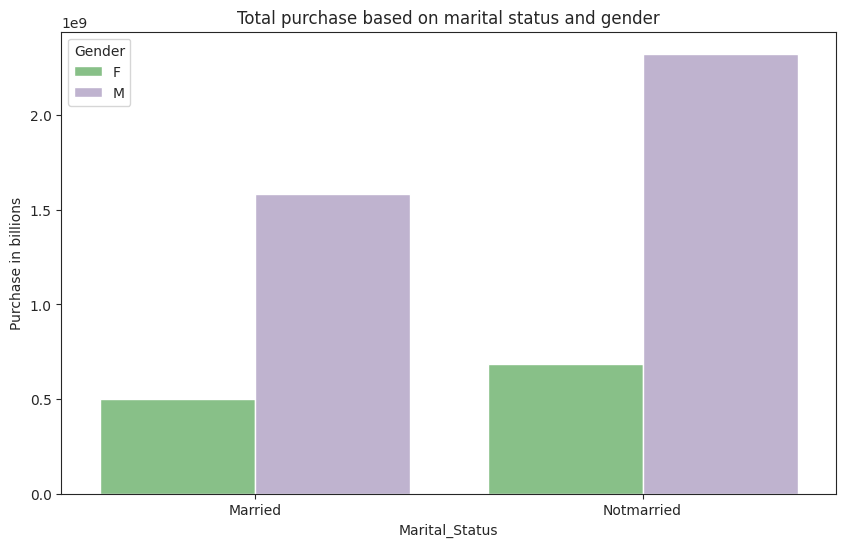

In [ ]:
plt.figure(figsize =(10,6))
sns.set_style("ticks")
sns.barplot(x="Marital_Status",y="Purchase",hue = "Gender",data = df_mg,palette="Accent")
plt.ylabel("Purchase in billions")
plt.title("Total purchase based on marital status and gender")

# Insight

*   Males married or unmarried have high total purchase amount than females.

In [ ]:
df_age=df.groupby(["Age","Gender"])["Purchase"].sum()
df_age=df_age.reset_index()
df_age

,Age,Gender,Purchase
0,0-17,F,42385978
1,0-17,M,92527205
2,18-25,F,205475842
3,18-25,M,708372833
4,26-35,F,442976233
5,26-35,M,1588794345
6,36-45,F,243438963
7,36-45,M,783130921
8,46-50,F,116706864
9,46-50,M,304136539


Text(0.5, 1.0, 'Total purchase based on Age and gender')

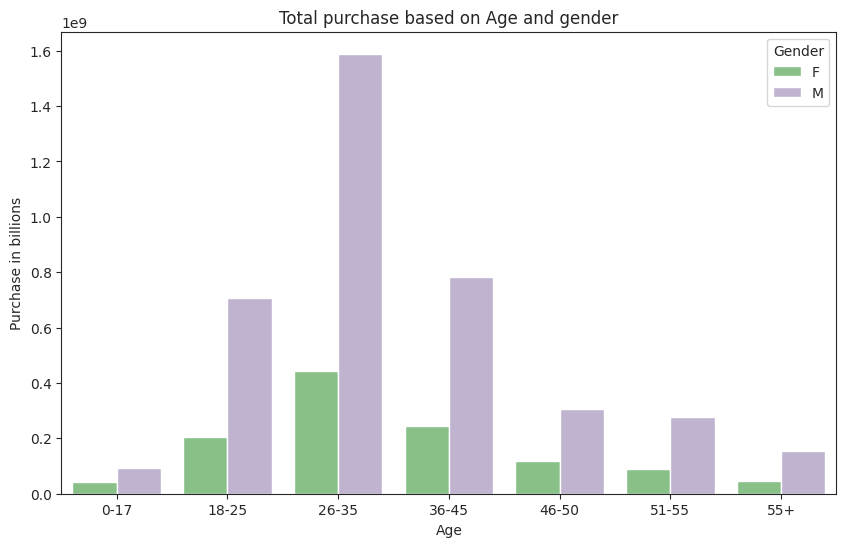

In [ ]:
plt.figure(figsize =(10,6))
sns.set_style("ticks")
sns.barplot(x="Age",y="Purchase",hue = "Gender",data = df_age,palette="Accent")
plt.ylabel("Purchase in billions")
plt.title("Total purchase based on Age and gender")

# Insight

*   Males belonging  to any age group  have high Total purchase amount than females.

In [ ]:
df_ct=df.groupby(["City_Category","Gender"])["Purchase"].sum()
df_ct=df_ct.reset_index()
df_ct

,City_Category,Gender,Purchase
0,A,F,306329915
1,A,M,1010141746
2,B,F,493617008
3,B,M,1621916597
4,C,F,386285719
5,C,M,1277521757


Text(0.5, 1.0, 'Total purchase based on City Category and gender')

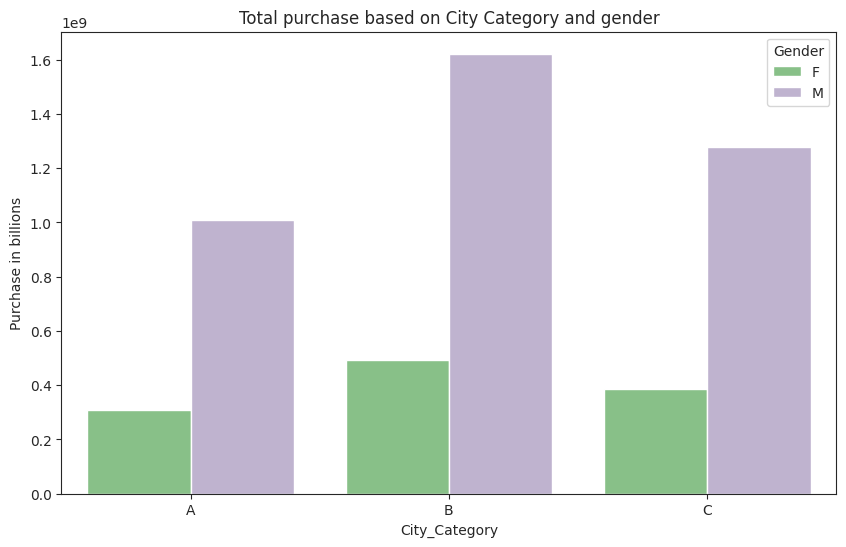

In [ ]:
plt.figure(figsize =(10,6))
sns.set_style("ticks")
sns.barplot(x="City_Category",y="Purchase",hue = "Gender",data = df_ct,palette="Accent")
plt.ylabel("Purchase in billions")
plt.title("Total purchase based on City Category and gender")

# Insight

*   Males belonging  to any category of city  have high total purchase amount than females.

<Axes: xlabel='Gender', ylabel='Purchase'>

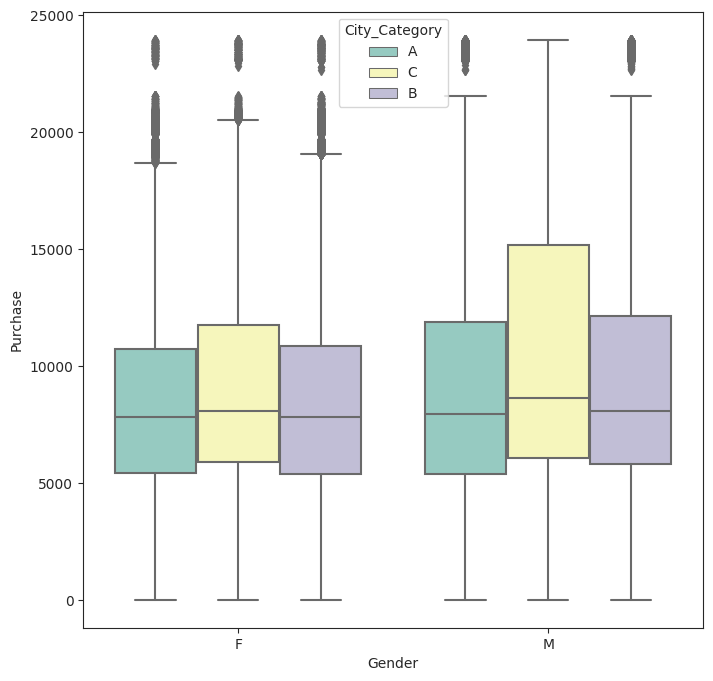

In [ ]:
plt.figure(figsize =(8,8))
sns.boxplot(data=df, y='Purchase', x='Gender', hue='City_Category', palette='Set3')

# Insight

*    people either Male or Female belonging  to C category city  make costliest purchases.

<ipython-input-98-0dd8dea822e2>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True,cmap="coolwarm")


<Axes: >

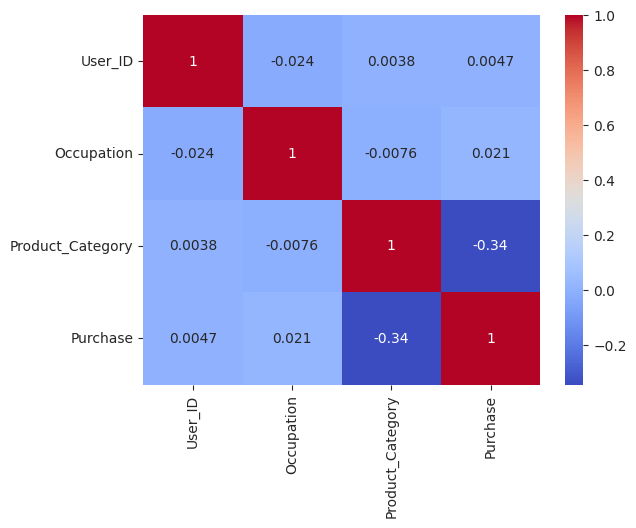

In [ ]:
sns.heatmap(df.corr(),annot=True,cmap="coolwarm")

# Insight

*   **Purchase and product_category  are very less correlated**

In [ ]:
df_male= df.loc[df["Gender"]=="M",["Purchase"]]
df_male

,Purchase
4,7969
5,15227
6,19215
7,15854
8,15686
...,...
550057,61
550058,121
550060,494
550062,473


In [ ]:
df_female= df.loc[df["Gender"]=="F",["Purchase"]]
df_female

,Purchase
0,8370
1,15200
2,1422
3,1057
14,5378
...,...
550061,599
550064,371
550065,137
550066,365


In [ ]:
male_avg = df_male['Purchase'].mean()
print("Population male mean",male_avg)
female_avg = df_female['Purchase'].mean()
print("Population female mean",female_avg)
male_std = np.std(df_male['Purchase'])
print("Population male SD",male_std)
female_std = np.std(df_female['Purchase'])
print("Population female SD",female_std)

Population male mean 9437.526040472265
Population female mean 8734.565765155476
Population male SD 5092.180063635965
Population female SD 4767.215738017004


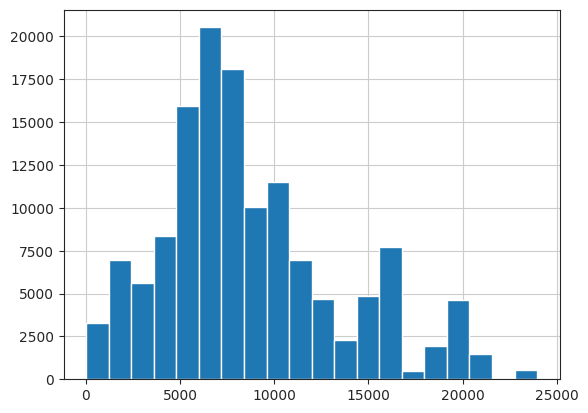

In [ ]:
df_female['Purchase'].hist(bins=20)
plt.show()

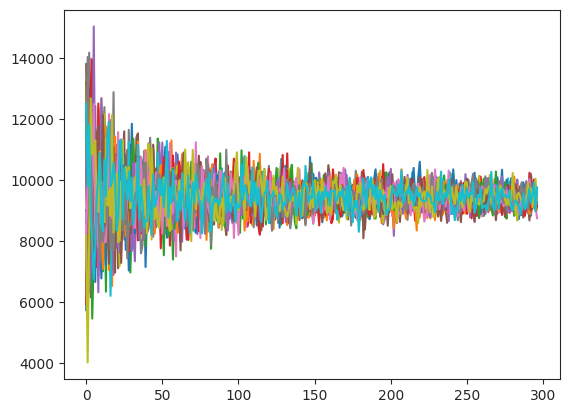

In [ ]:
#sample_size = 300
num_repitions = 10000
male_means_300 = []
female_means_300 = []
for j in range(20):
  for i in range(3,300):
    sample_male=df_male["Purchase"].sample(i)
    sample_mean_male=sample_male.mean()
    male_means_300.append(sample_mean_male)
  plt.plot(male_means_300)
  male_means_300 = []
  





In [ ]:
sample_size = 300
num_repitions = 10000
male_means_300 = []
female_means_300 = []
for i in range(10000):
  sample_male=df_male["Purchase"].sample(sample_size)
  sample_mean_male=sample_male.mean()
  male_means_300.append(sample_mean_male)
  sample_female=df_female["Purchase"].sample(sample_size)
  sample_mean_female=sample_female.mean()
  female_means_300.append(sample_mean_female)
  





In [ ]:
# for male with 300 sample size at 99% confidence interval 
mu=np.mean(male_means_300)
std=male_std/math.sqrt(300)
z=np.abs(norm.ppf(99.5/100))
left= mu -(z*std)
right= mu +(z*std)
lmale=[left,right]
print("male confidence interval at 300 sample size\n",lmale)

# for female with 300 sample size at 99% confidence interval 
mu=np.mean(female_means_300)
std=female_std/math.sqrt(300)
z=np.abs(norm.ppf(99.5/100))
left= mu -(z*std)
right= mu +(z*std)
lfemale=[left,right]
print("female confidence interval at 300 sample size \n",lfemale)

male confidence interval at 300 sample size
 [8678.201587013273, 10192.774550986725]
female confidence interval at 300 sample size 
 [8027.849608618739, 9445.768060047927]


In [ ]:

# for male with 300 sample size at 95% confidence interval 
mu=np.mean(male_means_300)
std=male_std/math.sqrt(300)
z=np.abs(norm.ppf(97.5/100))
left= mu -(z*std)
right= mu +(z*std)
lmale=[left,right]
print("male confidence interval at 300 sample size\n",lmale)

# for female with 300 sample size at 95% confidence interval 
mu=np.mean(female_means_300)
std=female_std/math.sqrt(300)
z=np.abs(norm.ppf(97.5/100))
left= mu -(z*std)
right= mu +(z*std)
lfemale=[left,right]
print("female confidence interval at 300 sample size \n",lfemale)

male confidence interval at 300 sample size
 [8859.264237464244, 10011.711900535754]
female confidence interval at 300 sample size 
 [8197.357502292987, 9276.260166373679]


In [ ]:

# for male with 300 sample size at 90% confidence interval 
mu=np.mean(male_means_300)
std=male_std/math.sqrt(300)
z=np.abs(norm.ppf(5/100))
left= mu -(z*std)
right= mu +(z*std)
lmale=[left,right]
print("male confidence interval at 300 sample size\n",lmale)

# for female with 300 sample size at 90% confidence interval 
mu=np.mean(female_means_300)
std=female_std/math.sqrt(300)
z=np.abs(norm.ppf(5/100))
left= mu -(z*std)
right= mu +(z*std)
lfemale=[left,right]
print("female confidence interval at 300 sample size \n",lfemale)

male confidence interval at 300 sample size
 [8951.905785491927, 9919.070352508072]
female confidence interval at 300 sample size 
 [8284.087005223502, 9189.530663443164]


In [ ]:
# for male with 300 sample size at 75% confidence interval 
mu=np.mean(male_means_300)
std=male_std/math.sqrt(300)
z=np.abs(norm.ppf(12.5/100))
left= mu -(z*std)
right= mu +(z*std)
lmale=[left,right]
print("male confidence interval at 300 sample size\n",lmale)

# for female with 300 sample size at 75% confidence interval 
mu=np.mean(female_means_300)
std=female_std/math.sqrt(300)
z=np.abs(norm.ppf(12.5/100))
left= mu -(z*std)
right= mu +(z*std)
lfemale=[left,right]
print("female confidence interval at 300 sample size \n",lfemale)

male confidence interval at 300 sample size
 [9097.28862615636, 9773.687511843638]
female confidence interval at 300 sample size 
 [8420.192044203259, 9053.425624463407]


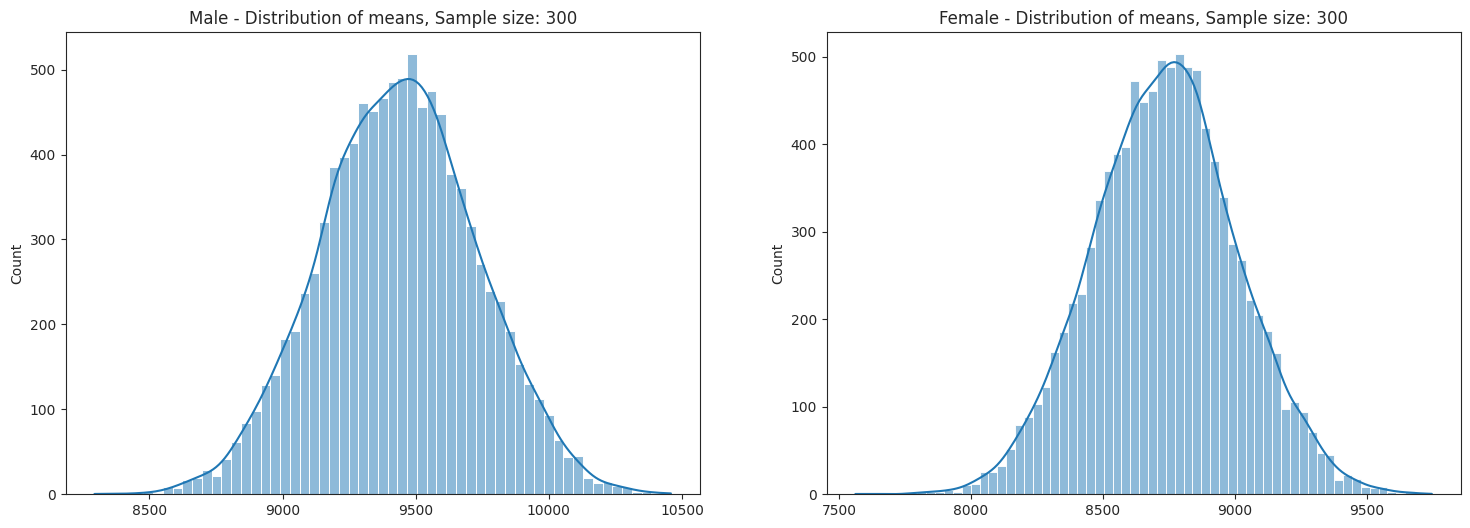

In [ ]:
fig=plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
sns.histplot(male_means_300,kde=True)
plt.title("Male - Distribution of means, Sample size: 300")


plt.subplot(1,2,2)
sns.histplot(female_means_300,kde=True)
plt.title("Female - Distribution of means, Sample size: 300")
plt.show()


In [ ]:
sample_size = 3000
num_repitions = 10000
male_means_3000 = []
female_means_3000 = []
for i in range(10000):
 sample_male=df_male["Purchase"].sample(sample_size)
 sample_mean_male=sample_male.mean()
 male_means_3000.append(sample_mean_male)
 sample_female=df_female["Purchase"].sample(sample_size)
 sample_mean_female=sample_female.mean()
 female_means_3000.append(sample_mean_female)

In [ ]:
# for male with 3000 sample size at 95% confidence interval 
mu=np.mean(male_means_3000)
std=male_std/math.sqrt(3000)
z=np.abs(norm.ppf(97.5/100))
left= mu -(z*std)
right= mu +(z*std)
lmale=[left,right]
print("male confidence interval at 3000 sample size\n",lmale)

# for female with 3000 sample size at 95% confidence interval 
mu=np.mean(female_means_3000)
std=female_std/math.sqrt(3000)
z=np.abs(norm.ppf(97.5/100))
left= mu -(z*std)
right= mu +(z*std)
lfemale=[left,right]
print("female confidence interval at 3000 sample size \n",lfemale)

male confidence interval at 3000 sample size
 [9254.176006861118, 9618.611956805547]
female confidence interval at 3000 sample size 
 [8563.439466894075, 8904.618446105926]


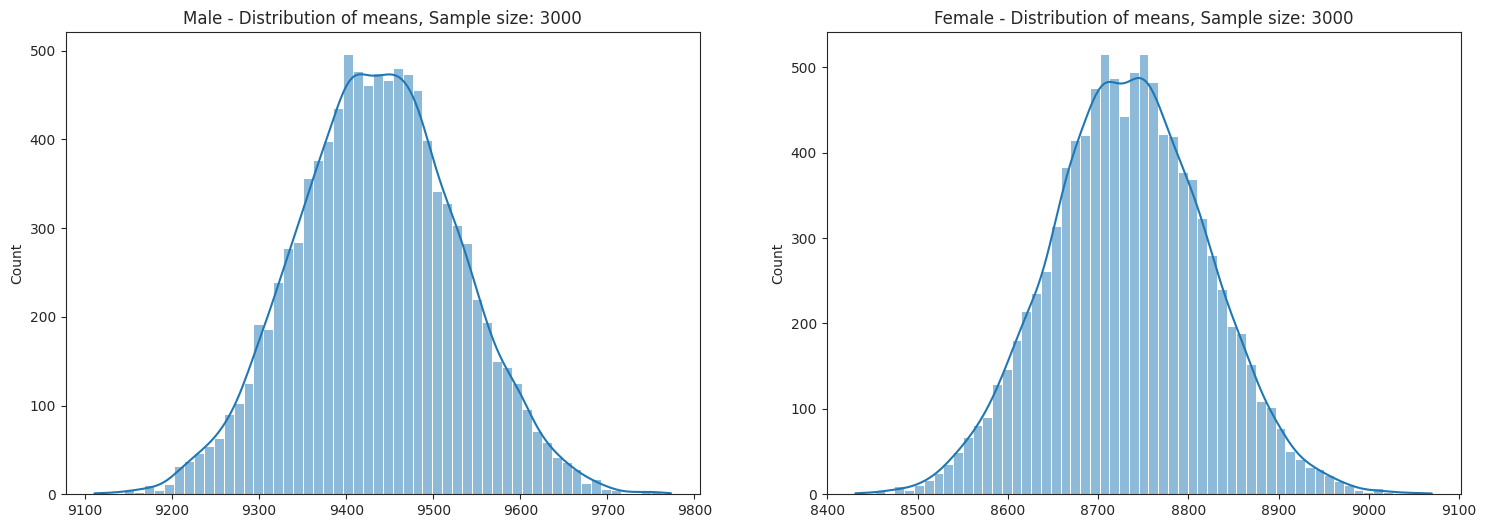

In [ ]:
fig=plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
sns.histplot(male_means_3000,kde=True)
plt.title("Male - Distribution of means, Sample size: 3000")

plt.subplot(1,2,2)
sns.histplot(female_means_3000,kde=True)
plt.title("Female - Distribution of means, Sample size: 3000")

plt.show()

In [ ]:
sample_size = 30000
num_repitions = 10000
male_means_30000 = []
female_means_30000 = []
for i in range(10000):
 sample_male=df_male["Purchase"].sample(sample_size)
 sample_mean_male=sample_male.mean()
 male_means_30000.append(sample_mean_male)
 sample_female=df_female["Purchase"].sample(sample_size)
 sample_mean_female=sample_female.mean()
 female_means_30000.append(sample_mean_female)

In [ ]:
# for male with 30000 sample size at 95% confidence interval 
mu=np.mean(male_means_30000)
std=male_std/math.sqrt(30000)
z=np.abs(norm.ppf(97.5/100))
left= mu -(z*std)
right= mu +(z*std)
lmale=[left,right]
print("male confidence interval at 3000 sample size\n",lmale)

# for female with 30000 sample size at 95% confidence interval 
mu=np.mean(female_means_30000)
std=female_std/math.sqrt(30000)
z=np.abs(norm.ppf(97.5/100))
left= mu -(z*std)
right= mu +(z*std)
lfemale=[left,right]
print("female confidence interval at 3000 sample size \n",lfemale)

male confidence interval at 3000 sample size
 [9379.750694679758, 9494.99546098691]
female confidence interval at 3000 sample size 
 [8680.664724492632, 8788.554990900702]


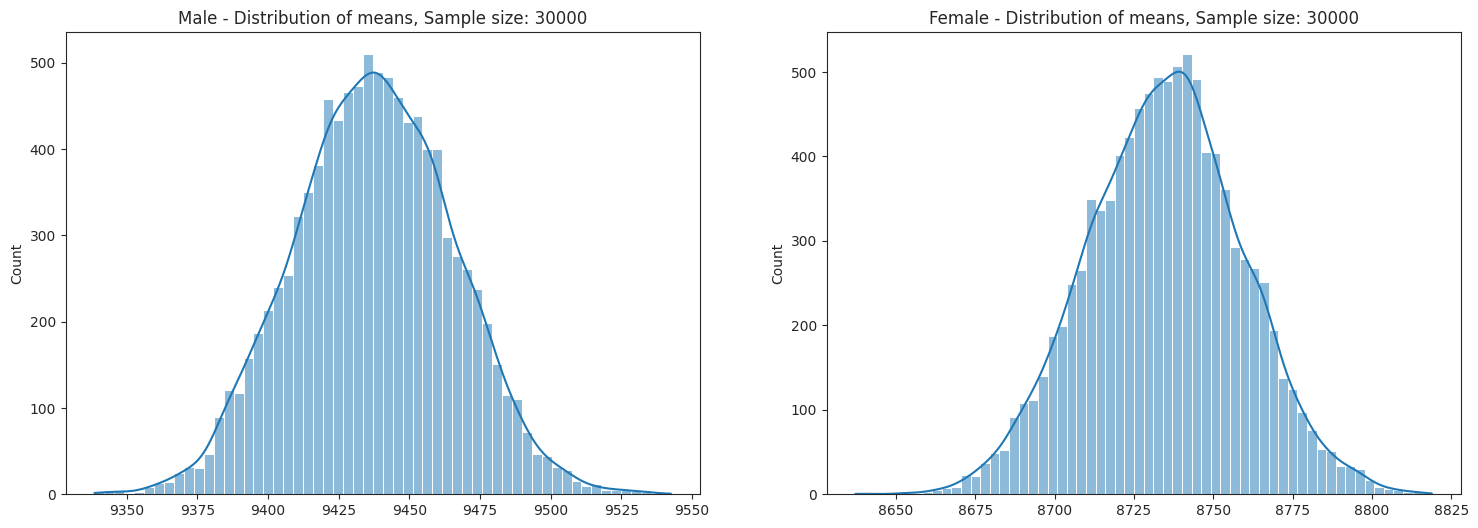

In [ ]:
fig=plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
sns.histplot(male_means_30000,kde=True)
plt.title("Male - Distribution of means, Sample size: 30000")

plt.subplot(1,2,2)
sns.histplot(female_means_30000,kde=True)
plt.title("Female - Distribution of means, Sample size: 30000")

plt.show()

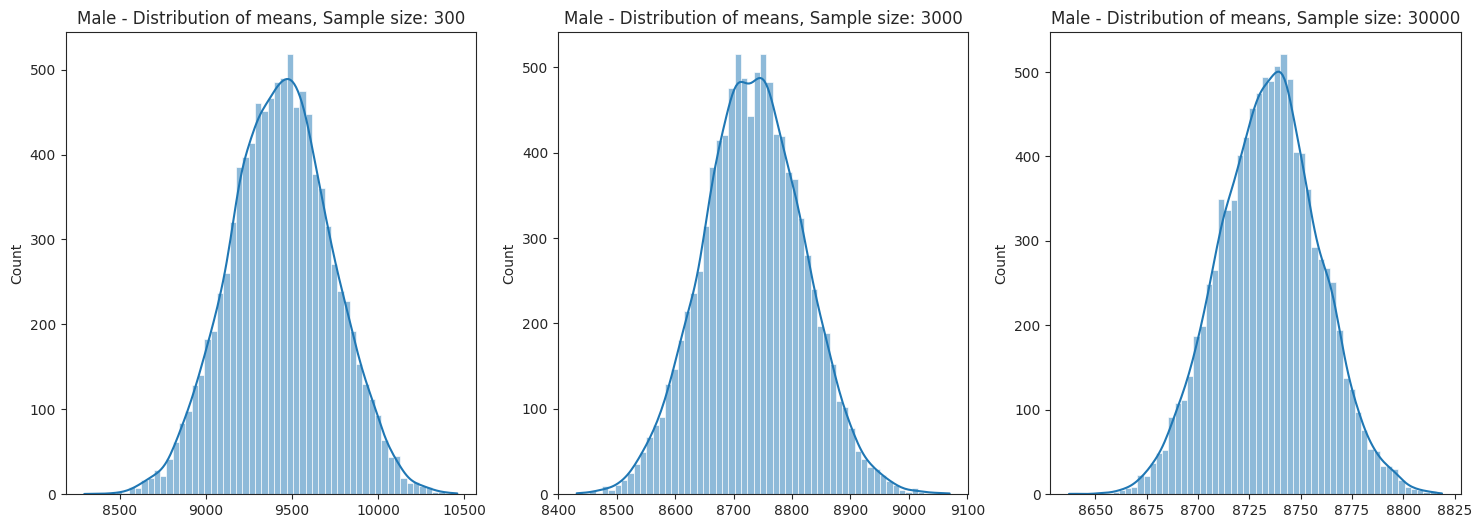

In [ ]:
fig=plt.figure(figsize=(18,6))

plt.subplot(1,3,1)
sns.histplot(male_means_300,kde=True)
plt.title("Male - Distribution of means, Sample size: 300")

plt.subplot(1,3,2)
sns.histplot(female_means_3000,kde=True)
plt.title("Male - Distribution of means, Sample size: 3000")

plt.subplot(1,3,3)
sns.histplot(female_means_30000,kde=True)
plt.title("Male - Distribution of means, Sample size: 30000")

plt.show()

# Insights

*  For small sample sizes  we find overlapping in males and females .So we have  to decrease our confidence level like for me  with  75 % confidence we can say that  males spend more than females 
*   So on increasing the sample sizes I find it that there is no overlapping  and I can say with 95 % confidense that male spend more than females.
*   As I increased the sample sizes from 300 to 3000 to 30000 i observed my sample mean for both male and females is getting closer to population mean . 

*  AVG ammount spent by males is more than females.





In [ ]:
df_married= df.loc[df["Marital_Status"]=="Married",["Purchase"]]
df_unmarried= df.loc[df["Marital_Status"]=="Notmarried",["Purchase"]]


In [ ]:
df_unmarried

,Purchase
0,8370
1,15200
2,1422
3,1057
4,7969
...,...
550056,254
550059,48
550062,473
550064,371


In [ ]:
married_avg = df_married['Purchase'].mean()
print("Population married mean",married_avg)
unmarried_avg = df_unmarried['Purchase'].mean()
print("Population unmarried mean",unmarried_avg)
married_std = np.std(df_married['Purchase'])
print("Population married SD",married_avg)
unmarried_std = np.std(df_married['Purchase'])
print("Population unmarried SD",unmarried_avg)

Population married mean 9261.174574082374
Population unmarried mean 9265.907618921507
Population married SD 9261.174574082374
Population unmarried SD 9265.907618921507


In [ ]:
sample_size = 300
num_repitions = 10000
married_means_300 = []
unmarried_means_300 = []
for i in range(10000):
  sample_married=df_married["Purchase"].sample(sample_size)
  sample_mean_married=sample_married.mean()
  married_means_300.append(sample_mean_married)
  sample_unmarried=df_unmarried["Purchase"].sample(sample_size)
  sample_mean_unmarried=sample_unmarried.mean()
  unmarried_means_300.append(sample_mean_unmarried)

In [ ]:
# for married with 300 sample size at 99% confidence interval 
mu=np.mean(married_means_300)
std=married_std/math.sqrt(300)
z=np.abs(norm.ppf(99.5/100))
left= mu -(z*std)
right= mu +(z*std)
lmarried=[left,right]
print("married confidence interval at 300 sample size\n",lmarried)

# for unmarried with 300 sample size at 99% confidence interval 
mu=np.mean(unmarried_means_300)
std=unmarried_std/math.sqrt(300)
z=np.abs(norm.ppf(99.5/100))
left= mu -(z*std)
right= mu +(z*std)
lunmarried=[left,right]
print("unmarried confidence interval at 300 sample size \n",lunmarried)




married confidence interval at 300 sample size
 [8512.95954869924, 10005.137785967425]
unmarried confidence interval at 300 sample size 
 [8521.935553365907, 10014.113790634092]


In [ ]:
# for married with 300 sample size at 95% confidence interval 
mu=np.mean(married_means_300)
std=married_std/math.sqrt(300)
z=np.abs(norm.ppf(97.5/100))
left= mu -(z*std)
right= mu +(z*std)
lmarried=[left,right]
print("married confidence interval at 300 sample size\n",lmarried)

# for unmarried with 300 sample size at 95% confidence interval 
mu=np.mean(unmarried_means_300)
std=unmarried_std/math.sqrt(300)
z=np.abs(norm.ppf(97.5/100))
left= mu -(z*std)
right= mu +(z*std)
lunmarried=[left,right]
print("unmarried confidence interval at 300 sample size \n",lunmarried)

married confidence interval at 300 sample size
 [8691.344976811088, 9826.752357855577]
unmarried confidence interval at 300 sample size 
 [8700.320981477755, 9835.728362522244]


In [ ]:
# for married with 300 sample size at 90% confidence interval 
mu=np.mean(married_means_300)
std=married_std/math.sqrt(300)
z=np.abs(norm.ppf(95/100))
left= mu -(z*std)
right= mu +(z*std)
lmarried=[left,right]
print("married confidence interval at 300 sample size\n",lmarried)

# for unmarried with 300 sample size at 90% confidence interval 
mu=np.mean(unmarried_means_300)
std=unmarried_std/math.sqrt(300)
z=np.abs(norm.ppf(95/100))
left= mu -(z*std)
right= mu +(z*std)
lunmarried=[left,right]
print("unmarried confidence interval at 300 sample size \n",lunmarried)

married confidence interval at 300 sample size
 [8782.616711565337, 9735.480623101328]
unmarried confidence interval at 300 sample size 
 [8791.592716232004, 9744.456627767995]


In [ ]:
# for married with 300 sample size at 60% confidence interval 
mu=np.mean(married_means_300)
std=married_std/math.sqrt(300)
z=np.abs(norm.ppf(20/100))
left= mu -(z*std)
right= mu +(z*std)
lmarried=[left,right]
print("married confidence interval at 300 sample size\n",lmarried)

# for unmarried with 300 sample size at 60% confidence interval 
mu=np.mean(unmarried_means_300)
std=unmarried_std/math.sqrt(300)
z=np.abs(norm.ppf(20/100))
left= mu -(z*std)
right= mu +(z*std)
lunmarried=[left,right]
print("unmarried confidence interval at 300 sample size \n",lunmarried)

married confidence interval at 300 sample size
 [9015.273024469492, 9502.824310197173]
unmarried confidence interval at 300 sample size 
 [9024.24902913616, 9511.80031486384]


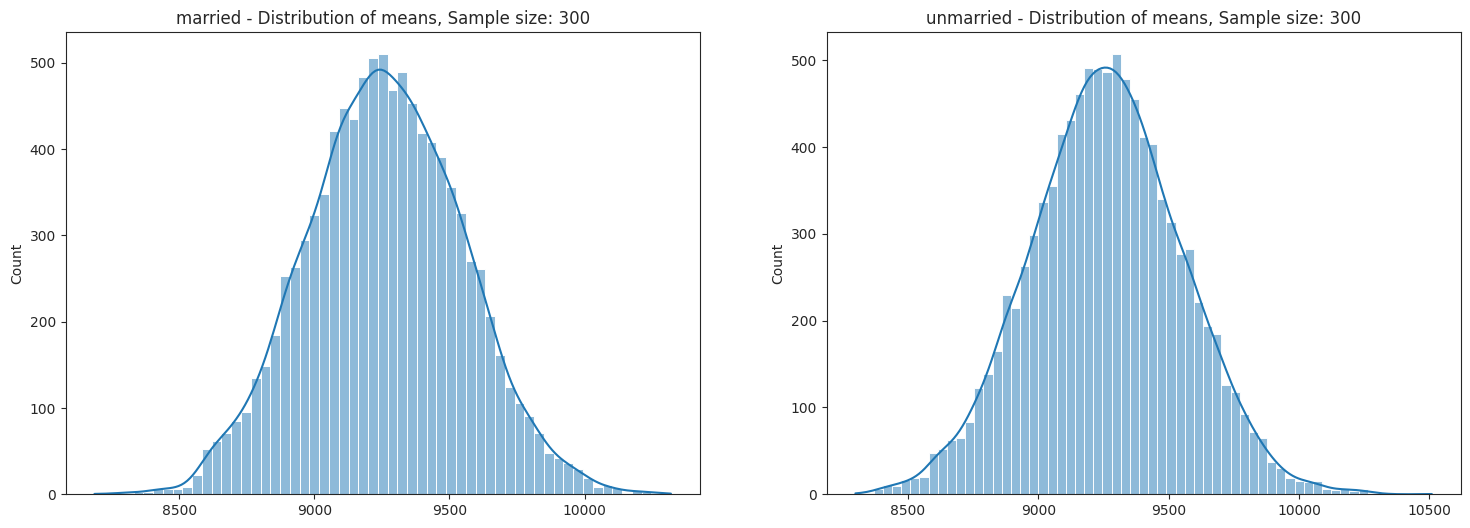

In [ ]:
fig=plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
sns.histplot(married_means_300,kde=True)
plt.title("married - Distribution of means, Sample size: 300")

plt.subplot(1,2,2)
sns.histplot(unmarried_means_300,kde=True)
plt.title("unmarried - Distribution of means, Sample size: 300")

plt.show()

# Insights

*  For small sample size (300)  we find overlapping in married and unmarried .So we can't confidently say who spend more . 

In [ ]:
df["Age"].value_counts()

26-35    219587
36-45    110013
18-25     99660
46-50     45701
51-55     38501
55+       21504
0-17      15102
Name: Age, dtype: int64

In [ ]:
df_0_17= df.loc[df["Age"]=="0-17",["Purchase"]]
df_18_25= df.loc[df["Age"]=="18-25",["Purchase"]]
df_26_35= df.loc[df["Age"]=="26-35",["Purchase"]]
df_36_45= df.loc[df["Age"]=="36-45",["Purchase"]]
df_46_50= df.loc[df["Age"]=="46-50",["Purchase"]]
df_51_55= df.loc[df["Age"]=="51-55",["Purchase"]]
df_55plus= df.loc[df["Age"]=="55+",["Purchase"]]

In [ ]:
df_55plus

,Purchase
4,7969
159,8596
160,5248
161,10592
162,3482
...,...
549925,121
549989,12
550008,50
550030,376


In [ ]:
avg_0_17 = df_0_17['Purchase'].mean()
print("Population 0_17 mean",avg_0_17)
std_0_17 = np.std(df_0_17['Purchase'])
print("Population 0_17 SD",married_avg)

avg_18_25 = df_18_25['Purchase'].mean()
print("Population 18_25 mean",avg_18_25)
std_18_25 = np.std(df_18_25['Purchase'])
print("Population 18_25 SD",std_18_25)

avg_26_35 = df_26_35['Purchase'].mean()
print("Population 26_35 mean",avg_26_35)
std_26_35 = np.std(df_26_35['Purchase'])
print("Population 26_35 SD",std_26_35)

avg_36_45 = df_36_45['Purchase'].mean()
print("Population 36_45 mean",avg_36_45)
std_36_45 = np.std(df_36_45['Purchase'])
print("Population 36_45 SD",std_36_45)

avg_46_50 = df_46_50['Purchase'].mean()
print("Population 46_50 mean",avg_46_50)
std_46_50 = np.std(df_46_50['Purchase'])
print("Population 46_50 SD",std_46_50)

avg_51_55 = df_51_55['Purchase'].mean()
print("Population 51_55 mean",avg_51_55)
std_51_55 = np.std(df_51_55['Purchase'])
print("Population 51_55 SD",std_51_55)

avg_55plus = df_55plus['Purchase'].mean()
print("Population 55plus mean",avg_55plus)
std_55plus = np.std(df_55plus['Purchase'])
print("Population 55plus SD",std_55plus)



Population 0_17 mean 8933.464640444974
Population 0_17 SD 9261.174574082374
Population 18_25 mean 9169.663606261289
Population 18_25 SD 5034.2967396277845
Population 26_35 mean 9252.690632869888
Population 26_35 SD 5010.515894010147
Population 36_45 mean 9331.350694917874
Population 36_45 SD 5022.901050378551
Population 46_50 mean 9208.625697468327
Population 46_50 SD 4967.162022122702
Population 51_55 mean 9534.808030960236
Population 51_55 SD 5087.302011173861
Population 55plus mean 9336.280459449405
Population 55plus SD 5011.377469555765


In [ ]:
sample_size = 300
num_repitions = 10000
df_0_17_means_300 = []
df_18_25_means_300= []
df_26_35_means_300= []
df_36_45_means_300= []
df_46_50_means_300= []
df_51_55_means_300= []
df_55plus_means_300= []

for i in range(10000):
  sample_df_0_17=df_0_17["Purchase"].sample(sample_size)
  sample_mean_df_0_17=sample_df_0_17.mean()
  df_0_17_means_300.append(sample_mean_df_0_17)
  
  sample_df_18_25=df_18_25["Purchase"].sample(sample_size)
  sample_mean_df_18_25=sample_df_18_25.mean()
  df_18_25_means_300.append(sample_mean_df_18_25)
  
  sample_df_26_35=df_26_35["Purchase"].sample(sample_size)
  sample_mean_df_26_35=sample_df_26_35.mean()
  df_26_35_means_300.append(sample_mean_df_26_35)

  sample_df_36_45=df_36_45["Purchase"].sample(sample_size)
  sample_mean_df_36_45=sample_df_36_45.mean()
  df_36_45_means_300.append(sample_mean_df_36_45)

  sample_df_46_50=df_46_50["Purchase"].sample(sample_size)
  sample_mean_df_46_50=sample_df_46_50.mean()
  df_46_50_means_300.append(sample_mean_df_46_50)

  sample_df_51_55=df_51_55["Purchase"].sample(sample_size)
  sample_mean_df_51_55=sample_df_51_55.mean()
  df_51_55_means_300.append(sample_mean_df_51_55)

  sample_df_55plus=df_55plus["Purchase"].sample(sample_size)
  sample_mean_df_55plus=sample_df_55plus.mean()
  df_55plus_means_300.append(sample_mean_df_55plus) 

In [ ]:
# for 0_17 with 300 sample size at 95% confidence interval 
mu=np.mean(df_0_17_means_300)
std=std_0_17/math.sqrt(300)
z=np.abs(norm.ppf(97.5/100))
left= mu -(z*std)
right= mu +(z*std)
l_0_17=[left,right]
print("0_17 confidence interval at 300 sample size\n",l_0_17)

# for 18_25 with 300 sample size at 95% confidence interval 
mu=np.mean(df_18_25_means_300)
std=std_18_25/math.sqrt(300)
z=np.abs(norm.ppf(97.5/100))
left= mu -(z*std)
right= mu +(z*std)
l_18_25=[left,right]
print("18_25 confidence interval at 300 sample size\n",l_18_25)

# for 26_35 with 300 sample size at 95% confidence interval 
mu=np.mean(df_26_35_means_300)
std=std_26_35/math.sqrt(300)
z=np.abs(norm.ppf(97.5/100))
left= mu -(z*std)
right= mu +(z*std)
l_26_35=[left,right]
print("26_35 confidence interval at 300 sample size\n",l_26_35)

# for 36_45 with 300 sample size at 95% confidence interval 
mu=np.mean(df_36_45_means_300)
std=std_36_45/math.sqrt(300)
z=np.abs(norm.ppf(97.5/100))
left= mu -(z*std)
right= mu +(z*std)
l_36_45=[left,right]
print("36_45 confidence interval at 300 sample size\n",l_36_45)

# for 46_50 with 300 sample size at 95% confidence interval 
mu=np.mean(df_46_50_means_300)
std=std_46_50/math.sqrt(300)
z=np.abs(norm.ppf(97.5/100))
left= mu -(z*std)
right= mu +(z*std)
l_46_50=[left,right]
print("46_50 confidence interval at 300 sample size\n",l_46_50)

# for 51_55 with 300 sample size at 95% confidence interval 
mu=np.mean(df_51_55_means_300)
std=std_51_55/math.sqrt(300)
z=np.abs(norm.ppf(97.5/100))
left= mu -(z*std)
right= mu +(z*std)
l_51_55=[left,right]
print("51_55 confidence interval at 300 sample size\n",l_51_55)

# for 55plus with 300 sample size at 95% confidence interval 
mu=np.mean(df_55plus_means_300)
std=std_55plus/math.sqrt(300)
z=np.abs(norm.ppf(97.5/100))
left= mu -(z*std)
right= mu +(z*std)
l_55plus=[left,right]
print("55plus confidence interval at 300 sample size\n",l_55plus)

0_17 confidence interval at 300 sample size
 [8358.27271901588, 9514.96716898412]
18_25 confidence interval at 300 sample size
 [8600.6858668331, 9740.033541166897]
26_35 confidence interval at 300 sample size
 [8689.25059339762, 9823.21625460238]
36_45 confidence interval at 300 sample size
 [8767.301230104877, 9904.069864561792]
46_50 confidence interval at 300 sample size
 [8647.064841025434, 9771.218777641234]
51_55 confidence interval at 300 sample size
 [8958.228960588533, 10109.572636744802]
55plus confidence interval at 300 sample size
 [8769.062547737998, 9903.223198262007]


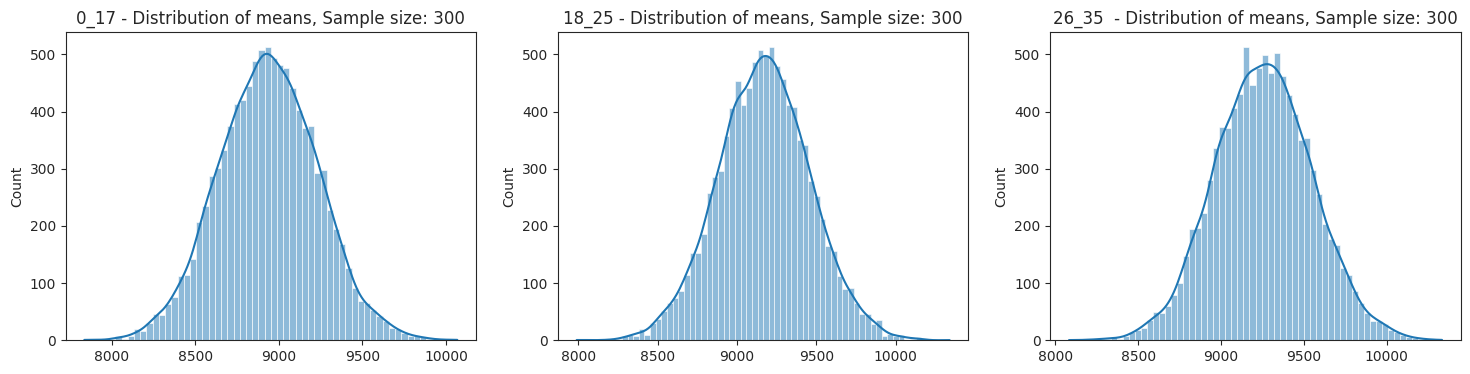

In [ ]:
fig=plt.figure(figsize=(18,4))

plt.subplot(1,3,1)
sns.histplot(df_0_17_means_300,kde=True)
plt.title("0_17 - Distribution of means, Sample size: 300")

plt.subplot(1,3,2)
sns.histplot(df_18_25_means_300,kde=True)
plt.title("18_25 - Distribution of means, Sample size: 300")

plt.subplot(1,3,3)
sns.histplot(df_26_35_means_300,kde=True)
plt.title("26_35  - Distribution of means, Sample size: 300")


plt.show()

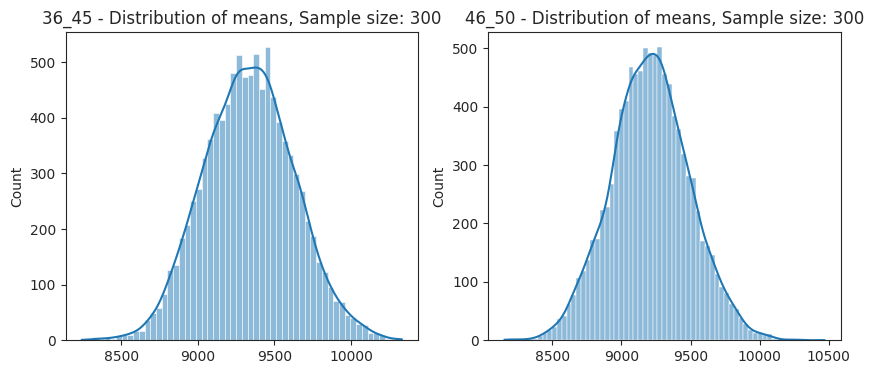

In [ ]:
fig=plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
sns.histplot(df_36_45_means_300,kde=True)
plt.title("36_45 - Distribution of means, Sample size: 300")

plt.subplot(1,2,2)
sns.histplot(df_46_50_means_300,kde=True)
plt.title("46_50 - Distribution of means, Sample size: 300")

plt.show()

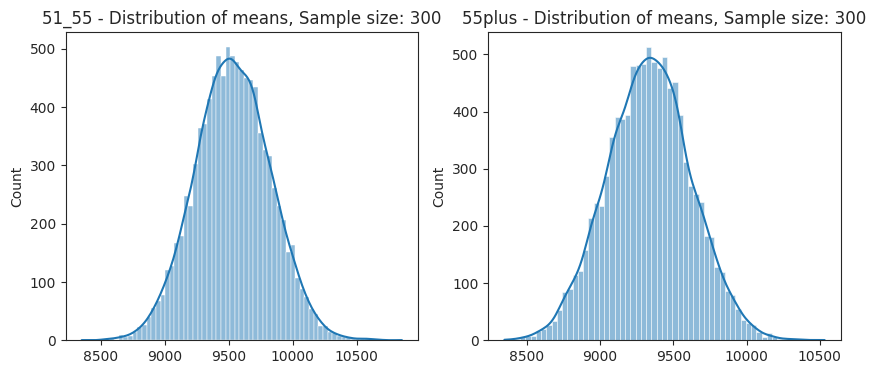

In [ ]:
fig=plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
sns.histplot(df_51_55_means_300,kde=True)
plt.title("51_55 - Distribution of means, Sample size: 300")

plt.subplot(1,2,2)
sns.histplot(df_55plus_means_300,kde=True)
plt.title("55plus - Distribution of means, Sample size: 300")

plt.show()

##**INSIGHTS**


*   **75%** of the customers are **Male** and **25% are Female**

*   **72%** of the users are  **unique Male customers** and **28% are  unique Female customers**

*   **78%** of the cutomers are between the **age  of 18-45**.

*   **59%** of the customers are **UnMarried** and **41% are Married**

*   **42 %** of the customers are from **B  category city** but **higher spenders are from *C* category city**


*   Product_Category - 1, 5 & 8 have highest purchasing frequency.


*   Product that belong to product_category 12,13,19,20 have lowest purcahse amount(cheapest).


*   **35.2 %** customers are those that are **living in city from past 1 year** only. 



---

>\>   ***Average amount spend by Female customers: 8734.56***

>\>    ***Average amount spend by Male customers: 9437.52***

###**Confidence Interval by Gender**

Now using the Central Limit Theorem for the population:

>  We can infer about the ***population  based on Gender*** that, 95% of the times: 
1.   Average amount spend by **male** customer will lie in between: ***(9379.80, 9495.00)***
2.   Average amount spend by **female** customer will lie in between:
 ***(8680.70, 8788.60)***


 

> **So we can say with 95 % confidense that male spend more money than females on black friday.**



---


> Confidence Interval by Marital_Status:
1.   Married confidence interval of means: (8691.30, 9826.80)
2.   Unmarried confidence interval of means: 8700.30, 9835.70)



---


> Confidence Interval by Age:
1.   For age group 0-17 --> confidence interval of means:
 (8358.27, 9514.96)
2.   For age group 18-25 --> confidence interval of means:
 (8600.68, 9740.03)
3.   For age group 26-35 --> confidence interval of means:
 (8689.25, 9823.21)
4.   For age group 36-45 --> confidence interval of means:
 (8767.30, 9904.06)
5.   For age group 46-50 --> confidence interval of means:
 (8647.06, 9771.21)
6.   For age group 51-55 --> confidence interval of means:
 (8958.22, 10109.57)
7.   For age group 55+ --> confidence interval of means:
 (8769.06, 9903.22)

















#**Recommendations**


*   Men spend more money than women, So company should focus on retaining the male customers and getting more male customers.
*   Since Female spent less compare to male. So comapny can add more products that female tends to buy on regular basis that will attract more female customers.
*   Unmarried customers spend more money than married customers, So company should focus on retaining there  Unmarried customers  and also think of a strategy so that married customers tends to buys more .
*   Product_Category - 1, 5, 8  have highest purchasing frequency. it means these are the products in these categories are liked more by customers. Company can focus on selling more of these products.

*   Customers in the age 18-45 spend more money than the others, So company should focus on retaining these customers.
*   People Living in C category cities have high purchase amount so company can add more products in these cities.




